# Fase (1): Análise exploratória e preparação dos dados

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.2, style='whitegrid', rc={'figure.figsize': (8,4)})

In [429]:
df = pd.read_csv('NPHA-doctor-visits.csv')

In [430]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [432]:
for i in df.columns:
    print(f'{i}')
    print(f'{df[i].unique()}')

Number of Doctors Visited
[3 2 1]
Age
[2]
Phyiscal Health
[ 4  3  2  5  1 -1]
Mental Health
[ 3  2  1  4 -1  5]
Dental Health
[ 3  4  1  6  2  5 -1]
Employment
[3 1 2 4]
Stress Keeps Patient from Sleeping
[0 1]
Medication Keeps Patient from Sleeping
[0 1]
Pain Keeps Patient from Sleeping
[0 1]
Bathroom Needs Keeps Patient from Sleeping
[0 1]
Uknown Keeps Patient from Sleeping
[1 0]
Trouble Sleeping
[ 2  3  1 -1]
Prescription Sleep Medication
[ 3  1  2 -1]
Race
[1 4 2 5 3]
Gender
[2 1]


In [433]:
# Vamos usar apenas respostas válidas para o nosso caso, excluindo onde temos "-1"
df = df.drop(df[(df == -1).any(axis=1)].index)

In [434]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [435]:
df.shape

(696, 15)

### Transformação e análise
#### Objetivo: Agrupar dados apenas com vriáveis sobre medicação,autopercepção da saúde mental, física e dentária, e problemas com o sono.

In [436]:
df.columns

Index(['Number of Doctors Visited', 'Age', 'Phyiscal Health', 'Mental Health',
       'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping',
       'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',
       'Prescription Sleep Medication', 'Race', 'Gender'],
      dtype='object')

In [437]:
df_filtro = df.drop(columns=['Number of Doctors Visited', 'Age', 'Employment', 'Race', 'Gender']).copy()

In [438]:
df_filtro.head()

,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication
0,4,3,3,0,0,0,0,1,2,3
1,4,2,3,1,0,0,1,0,3,3
2,3,2,3,0,0,0,0,1,3,3
3,3,2,3,0,0,0,1,0,3,3
4,3,3,3,1,0,0,0,0,2,3


In [439]:
df_filtro.astype('str').describe()

,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication
count,696,696,696,696,696,696,696,696,696,696
unique,5,5,6,2,2,2,2,2,3,3
top,3,2,2,0,0,0,1,0,3,3
freq,286,278,211,523,657,544,352,404,352,627


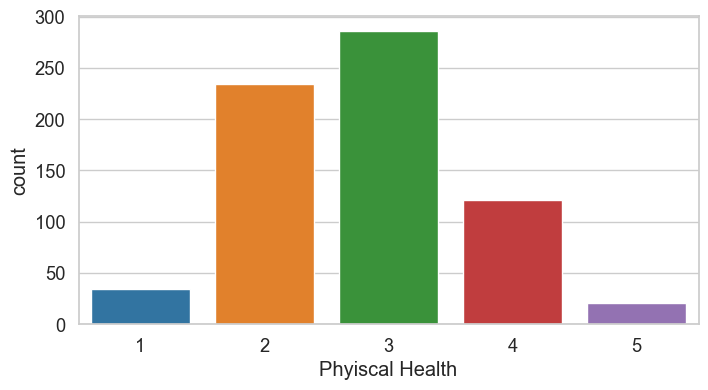

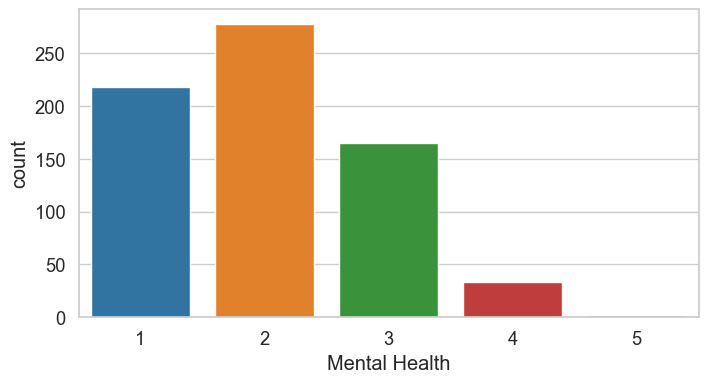

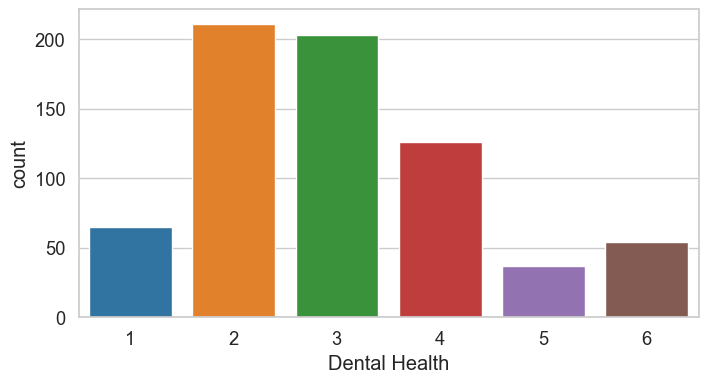

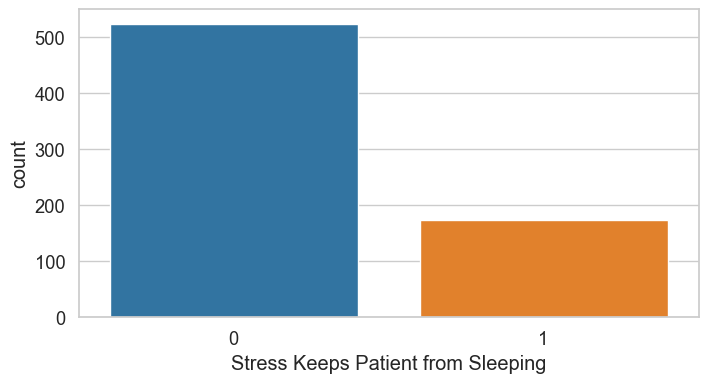

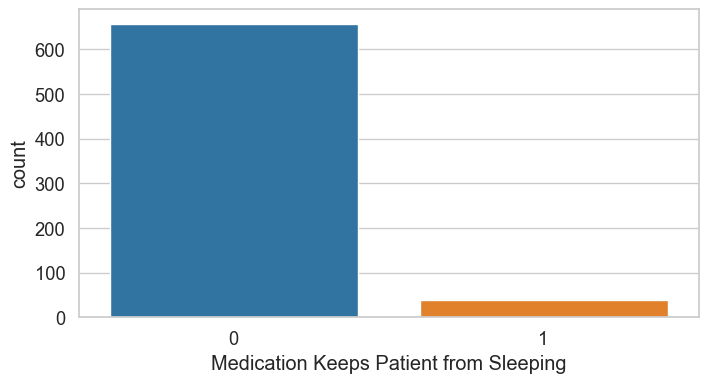

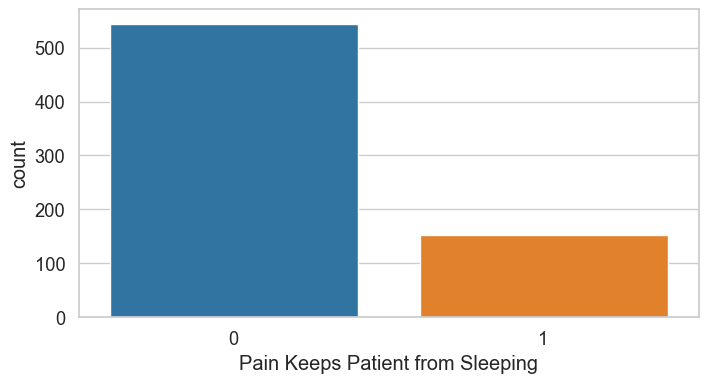

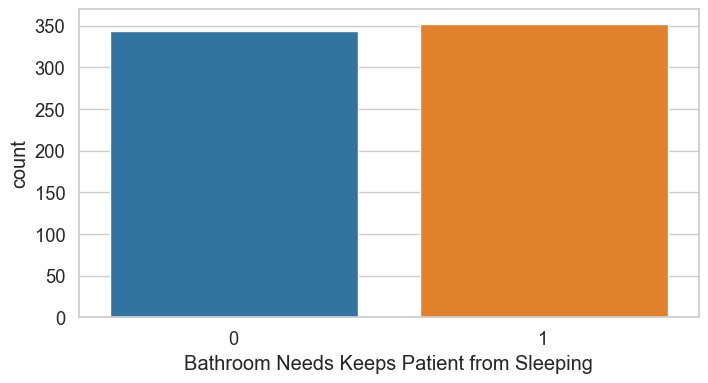

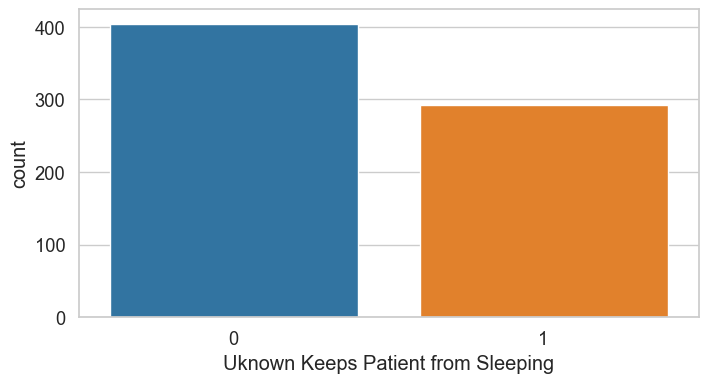

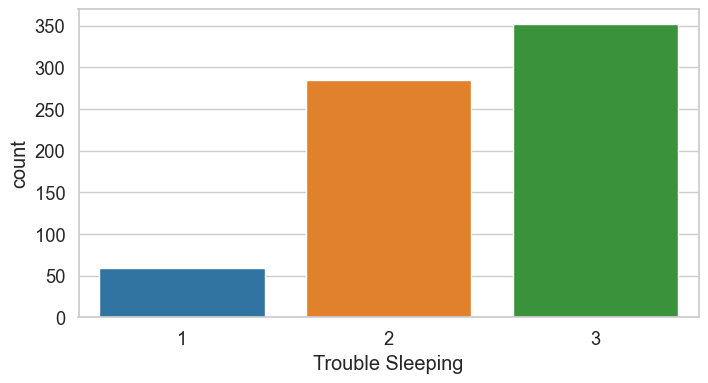

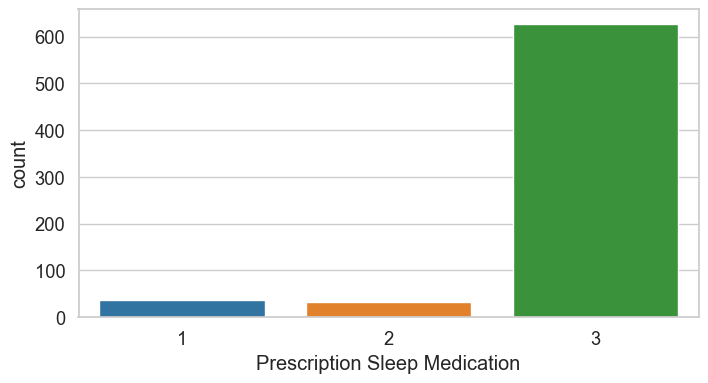

In [440]:
for i in df_filtro.columns:
    sns.countplot(data=df_filtro, x=i, palette='tab10')
    plt.show()

In [441]:
df_filtro = pd.get_dummies(df_filtro.astype('str'))

In [442]:
df_filtro.head()

,Phyiscal Health_1,Phyiscal Health_2,Phyiscal Health_3,Phyiscal Health_4,Phyiscal Health_5,Mental Health_1,Mental Health_2,Mental Health_3,Mental Health_4,Mental Health_5,...,Bathroom Needs Keeps Patient from Sleeping_0,Bathroom Needs Keeps Patient from Sleeping_1,Uknown Keeps Patient from Sleeping_0,Uknown Keeps Patient from Sleeping_1,Trouble Sleeping_1,Trouble Sleeping_2,Trouble Sleeping_3,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3
0,False,False,False,True,False,False,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True
1,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,True,False,False,True
2,False,False,True,False,False,False,True,False,False,False,...,True,False,False,True,False,False,True,False,False,True
3,False,False,True,False,False,False,True,False,False,False,...,False,True,True,False,False,False,True,False,False,True
4,False,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True


In [443]:
df_filtro.shape

(696, 32)

# Fase (2): Aplicação do cálculo das matrizes de Hamming e Jaccard

### Primeiro, precisamos encontrar as matrizes de distância de cada método
https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [444]:
# importar a biblioteca do scipy.

from scipy.spatial.distance import pdist, squareform

In [445]:
# Calculando a matriz de hamming

dist_hamming = pdist(df_filtro, metric='hamming')

In [446]:
dist_hamming

array([0.3125, 0.1875, 0.3125, ..., 0.375 , 0.375 , 0.25  ])

In [447]:
matriz_hamming = squareform(dist_hamming)
matriz_hamming

array([[0.    , 0.3125, 0.1875, ..., 0.1875, 0.375 , 0.4375],
       [0.3125, 0.    , 0.25  , ..., 0.125 , 0.25  , 0.25  ],
       [0.1875, 0.25  , 0.    , ..., 0.125 , 0.25  , 0.375 ],
       ...,
       [0.1875, 0.125 , 0.125 , ..., 0.    , 0.375 , 0.375 ],
       [0.375 , 0.25  , 0.25  , ..., 0.375 , 0.    , 0.25  ],
       [0.4375, 0.25  , 0.375 , ..., 0.375 , 0.25  , 0.    ]])

In [448]:
matriz_hamming.shape

(696, 696)

In [449]:
# Calculando a matriz de jaccard

dist_jaccard = pdist(df_filtro, metric='jaccard')

In [450]:
dist_jaccard

array([0.66666667, 0.46153846, 0.66666667, ..., 0.75      , 0.75      ,
       0.57142857])

In [451]:
matriz_jaccard = squareform(dist_jaccard)
matriz_jaccard

array([[0.        , 0.66666667, 0.46153846, ..., 0.46153846, 0.75      ,
        0.82352941],
       [0.66666667, 0.        , 0.57142857, ..., 0.33333333, 0.57142857,
        0.57142857],
       [0.46153846, 0.57142857, 0.        , ..., 0.33333333, 0.57142857,
        0.75      ],
       ...,
       [0.46153846, 0.33333333, 0.33333333, ..., 0.        , 0.75      ,
        0.75      ],
       [0.75      , 0.57142857, 0.57142857, ..., 0.75      , 0.        ,
        0.57142857],
       [0.82352941, 0.57142857, 0.75      , ..., 0.75      , 0.57142857,
        0.        ]])

In [452]:
matriz_jaccard.shape

(696, 696)

# Fase (3): Investigando o melhor número de clusters, incluindo:
* Agrupamento hierárquico: distância de hamming
* Agruapmento hierárquico: distância de jaccard
* K-modes

In [453]:
# !pip install kmodes

In [454]:
from kmodes.kmodes import KModes

In [455]:
from sklearn.metrics import silhouette_score

In [456]:
# Criando uma lista para cada algoritmo

s_agg_hamming = list()
s_agg_jaccard = list()
s_kmodes = list()

# Iterando de 2 a 12 clusters, e retornando a métrica da silhueta de cada algoritmo
# Observação: para o agrupamento hierárquico, prestem atenção aos dados utilizados e métrica

for i in range(2,13):
    # Agrupamento hierárquico com a distância de Hamming
    agg_hamming = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    agg_hamming.fit(matriz_hamming)
    s_agg_hamming.append(silhouette_score(df_filtro, agg_hamming.labels_, metric='hamming'))

    # Agrupamento hierárquico com a distância de Jaccard
    agg_jaccard = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    agg_jaccard.fit(matriz_jaccard)
    s_agg_jaccard.append(silhouette_score(df_filtro, agg_jaccard.labels_, metric='jaccard'))
    
    # K-Modes
    k_modes = KModes(n_clusters=i, init='Cao', random_state=42)
    k_modes.fit(df_filtro)
    s_kmodes.append(silhouette_score(df_filtro, k_modes.labels_, metric='hamming'))

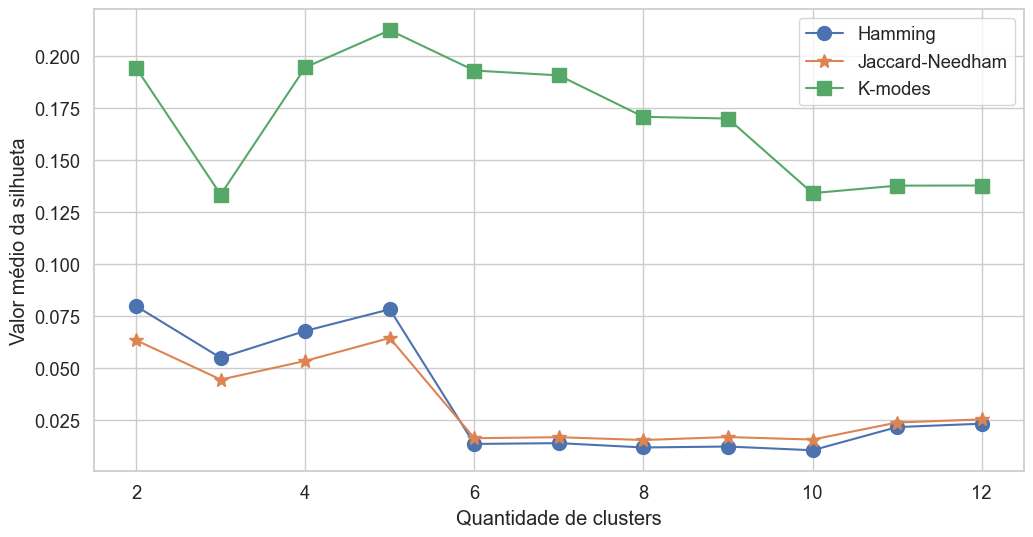

In [457]:
# Plotando os resultados e comparando-os

plt.figure(figsize=(12,6))
plt.plot([i for i in range(2,13)], s_agg_hamming, '-o',
         [i for i in range(2,13)], s_agg_jaccard, '-*', 
         [i for i in range(2,13)], s_kmodes, '-s',
         markersize=10)
plt.legend(['Hamming', 'Jaccard-Needham', 'K-modes'])
plt.xlabel('Quantidade de clusters')
plt.ylabel('Valor médio da silhueta')
plt.show()

#### Nos parece que 5 clusters é para qual converge dos os algoritmos, mesmo com valores relativamente baixos.

# Fase (4): Montando os clusters

In [458]:
agg_hamming = AgglomerativeClustering(n_clusters=5, metric='precomputed', linkage='complete')
agg_hamming.fit(matriz_hamming)

AgglomerativeClustering(linkage='complete', metric='precomputed', n_clusters=5)

In [459]:
df['clusters'] = agg_hamming.labels_
df['clusters'].value_counts()

clusters
0    252
2    164
1    141
4    118
3     21
Name: count, dtype: int64

In [460]:
agg_jaccard = AgglomerativeClustering(n_clusters=5, metric='precomputed', linkage='complete')
agg_jaccard.fit(matriz_jaccard)

AgglomerativeClustering(linkage='complete', metric='precomputed', n_clusters=5)

In [461]:
df['clusters'] = agg_jaccard.labels_
df['clusters'].value_counts()

clusters
0    252
2    164
1    141
4    118
3     21
Name: count, dtype: int64

In [462]:
k_modes = KModes(n_clusters=5, init='Cao', random_state=42)
k_modes.fit(df_filtro)

KModes(n_clusters=5, n_init=1, random_state=42)

In [463]:
df['clusters'] = k_modes.labels_
df['clusters'].value_counts()

clusters
0    252
3    225
1     81
2     79
4     59
Name: count, dtype: int64

In [464]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender,clusters
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2,3
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1,0
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1,3
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2,0
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2,1


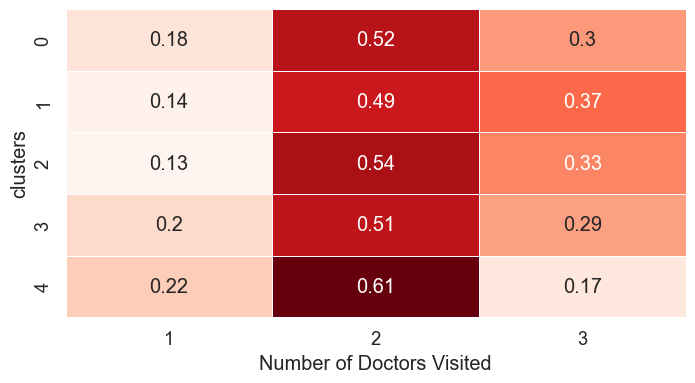

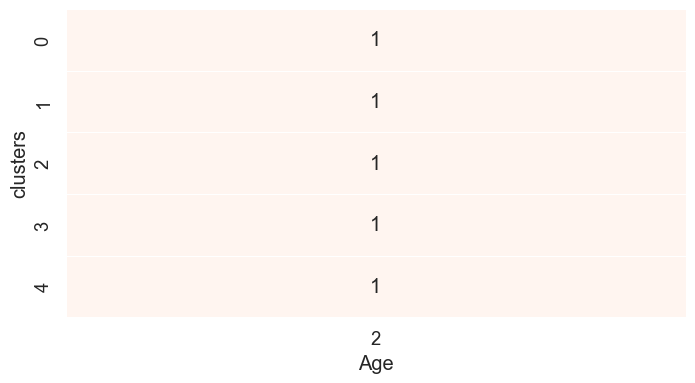

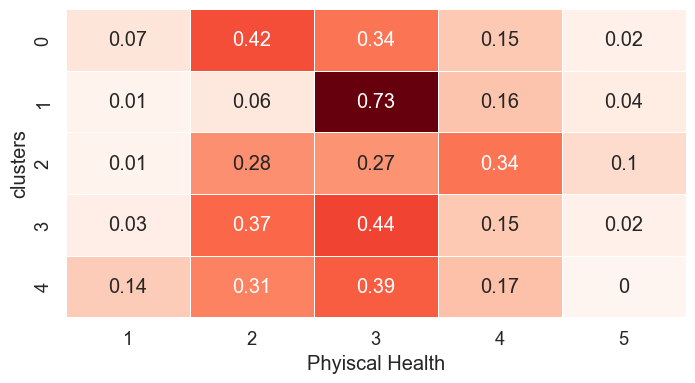

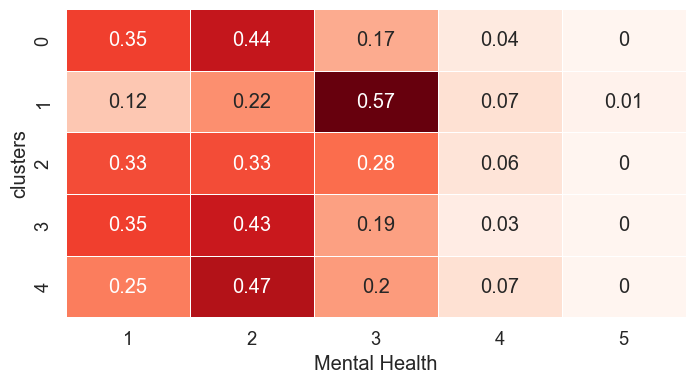

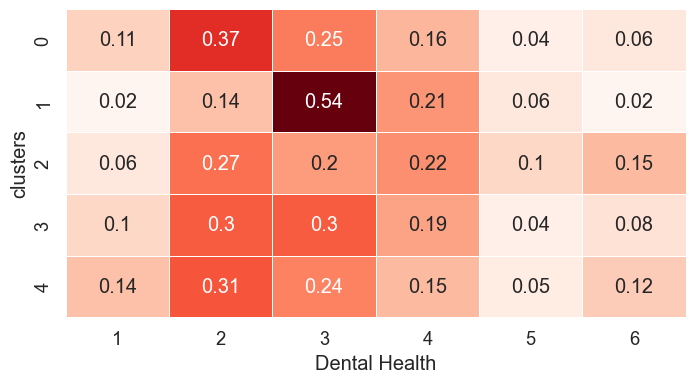

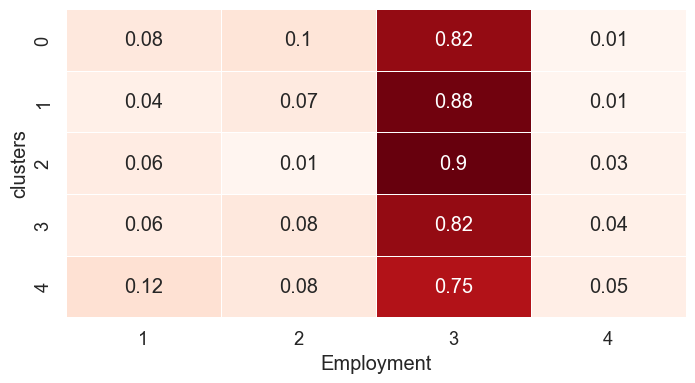

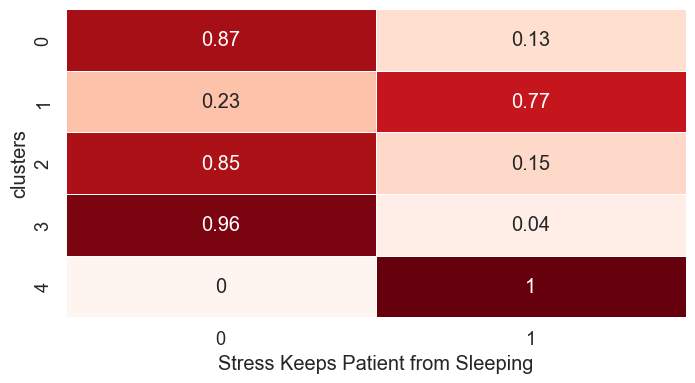

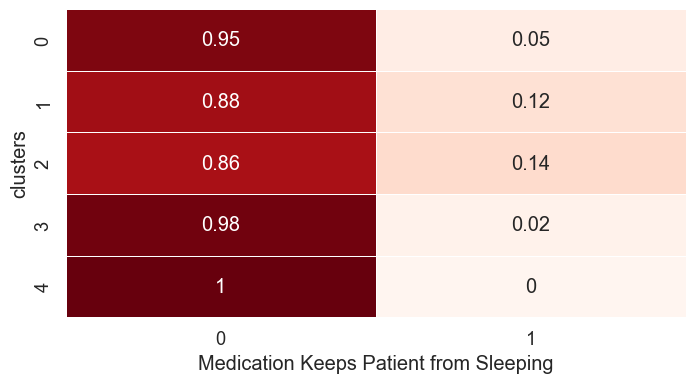

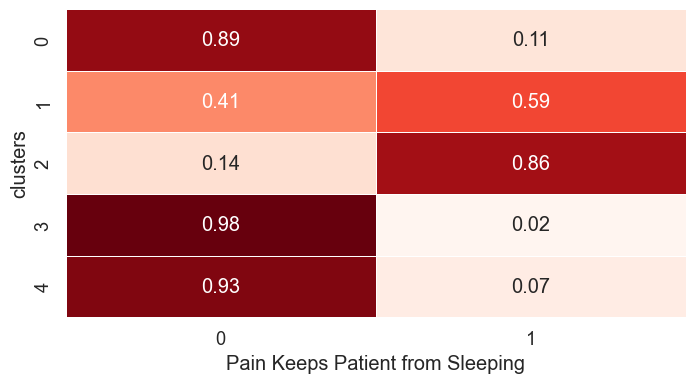

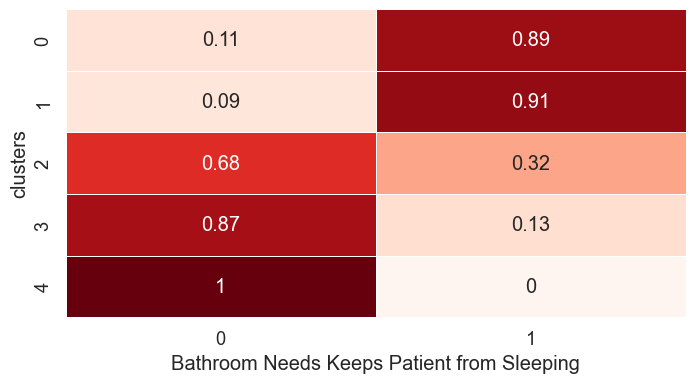

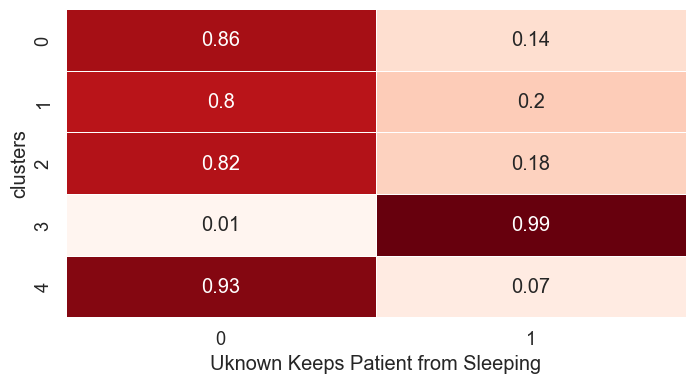

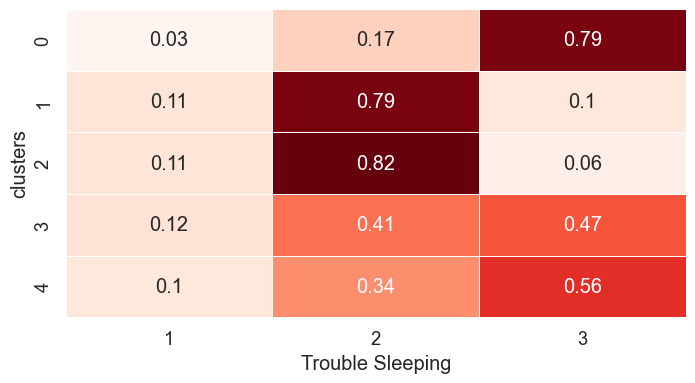

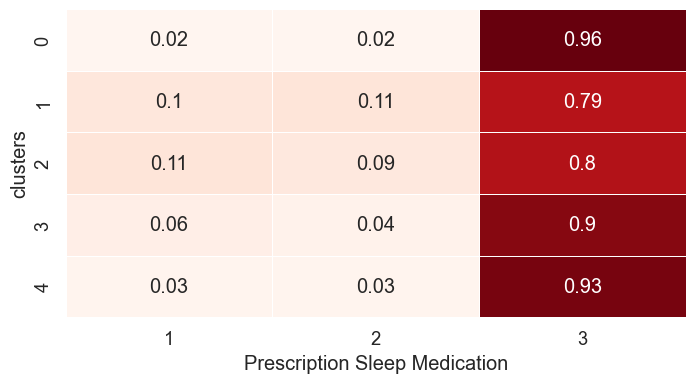

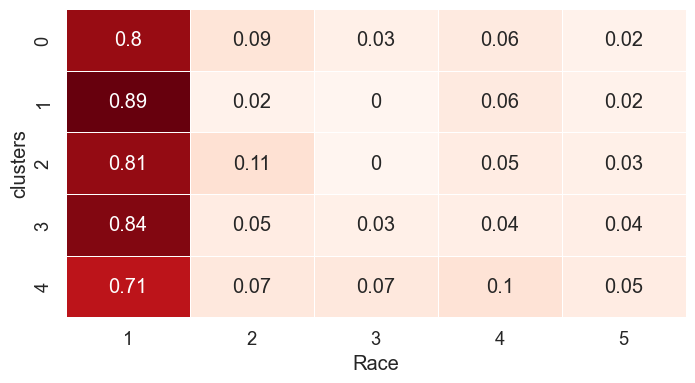

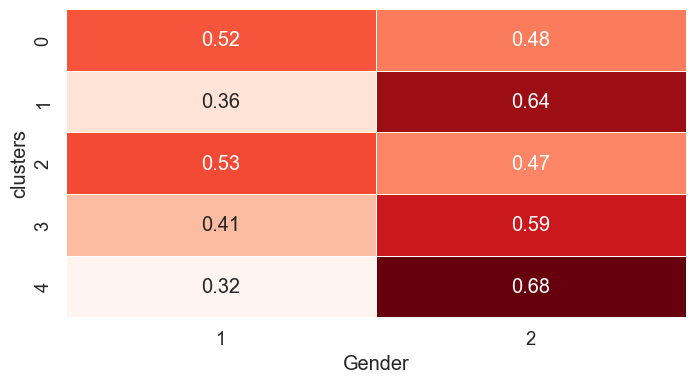

In [467]:
for col in df.columns[:-1]:
    # Criar tabela de contingência normalizada (proporções)
    crosstab = pd.crosstab(df['clusters'], df[col], normalize='index').round(2)

    sns.heatmap(crosstab, annot=True, cbar=False, linewidths=.5, cmap='Reds')
    plt.show()